In [1]:
set.seed(2020)
source('run_para.R')
suppressPackageStartupMessages(library(SummarizedExperiment))
options(repr.plot.width=14, repr.plot.height=10)
library(Seurat)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'run_para.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
## BCR
S <- readRDS('write/matrix_S/bcr_w_7celltype_tomo32_s.rds')
# S <-readRDS('write/matrix_S/hvgs_bcr_w_tomo35_s.rds')
A0 <- read.csv('./write/matrix_A0/A0_BCR.csv')
W <- readRDS('write/matrix_W/bcr_w.rds')
A <- read.table('write/matrix_A/bcr_w_7celltype_hvg_tomo_s_32_a.csv')
#X <- as.matrix(read.table('write/matrix_X/X_BCR.txt'))
BCR <- readRDS('/gpfs/loomis/project/zhao/bz234//Data/BCR/BCR_celltype_annotated.rds')
X <- assay(BCR[, colData(BCR)$marker_class == "type"])
X <- t(X)
cofactor <- 5
X <- asinh(X / cofactor)
colnames(X) <- c(1:ncol(X))
metadata.BCR<-rowData(BCR)
metadata.BCR <- data.frame(metadata.BCR@listData)
rownames(metadata.BCR) <- colnames(X)

In [3]:
table(metadata.BCR$population_id)


   CD4 T-cells    CD8 T-cells             DC memory B cells      monocytes 
         62890          51150           1980           3265          18436 
 naïve B cells       NK cells 
          6651          24518 

In [4]:
## clean the input
rownames(A0) <- A0[,1]
A0 <- A0[,-1]
rownames(S) <- rownames(A)
colnames(S) <- c("memory.B.cells","naïve.B.cells","CD4.T.cells","DC","monocytes","NK.cells","CD8.T.cells")
S <- S[,colnames(A0)]
colnames(W) <- c('CD4.T.cells','CD8.T.cells','DC','memory.B.cells','monocytes','naïve.B.cells','NK.cells')
W <- W[,colnames(A0)]

A0<-as.matrix(A0)
S <- S[,-c(1,5)]
A0 <- A0[,-c(1,5)]
W <- W[,-c(1,5)]
AS <- t(A)%*%S

idx.DC = which(metadata.BCR$population_id == 'DC')
idx.mB = which(metadata.BCR$population_id == 'memory B cells')
metadata.BCR <- metadata.BCR[-c(idx.mB,idx.DC),]
X <- X[,-c(idx.mB,idx.DC)]

metadata.BCR$population_id <- droplevels(metadata.BCR$population_id)

In [7]:
sample.id.list <- unique(metadata.BCR$sample_id)
W.true <- list()
#for(i in c(1:length(sample.id.list))){
i=1
sample <- sample.id.list[i]
    X.sample <- X[,metadata.BCR$sample_id %in% sample]
    metadata.sample <- metadata.BCR[metadata.BCR$sample_id %in% sample,]
    seur <- CreateSeuratObject( X.sample)
    seur@meta.data$label <- metadata.sample$population_id
    seur <- NormalizeData(seur) 
    seur@assays$RNA@data = seur@assays$RNA@counts
    seur <- FindVariableFeatures(seur, slot='counts', selection.method = "vst", nfeatures = 10)
    seur <- ScaleData(seur)
    seur <- RunPCA(seur,verbose = TRUE,features = rownames(seur))
    seur <- FindNeighbors(seur, dims = 1:6)
    seur <- FindClusters(seur, resolution = 0.3)
    seur <- RunUMAP(seur, dims = 1:5)

    ## ground truth
    Idents(seur) <- "label"
    W <- AverageExpression(seur,slot="counts")$RNA
    colnames(W) <- c('CD4.T.cells','CD8.T.cells','monocytes','naïve.B.cells','NK.cells')
    W <- as.matrix(W[,colnames(A0)])
    W.true[[i]] <- W

    D = nrow(X.sample)
    K = ncol(AS)
    N = ncol(X.sample)

Warning message:
“The following arguments are not used: slot”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.2742”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.449”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.1352”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlb

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2751
Number of edges: 85099

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8681
Number of communities: 6
Elapsed time: 0 seconds


10:04:02 UMAP embedding parameters a = 0.9922 b = 1.112

10:04:02 Read 2751 rows and found 5 numeric columns

10:04:02 Using Annoy for neighbor search, n_neighbors = 30

10:04:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

10:04:02 Writing NN index file to temp file /tmp/RtmpDSIZzk/file275d7bd07db4

10:04:02 Searching Annoy index using 1 thread, search_k = 3000

10:04:03 Annoy recall = 100%

10:04:04 Commencing smooth kNN distance calibration using 1 thread

10:04:05 Initializing from normalized Laplacian + noise

10:04:05 Commencing optimization for 500 epochs, with 100922 positive edges

10:04:14 Optimization finished

Finished averaging RNA for cluster CD4 T-cells

Finished averaging RNA for cluster CD8 T-cells

Finished averaging RNA for cluster monocytes

Fin

[1] "step 1 : get an initial eta by kkt condition"
[1] "iteration = 51"
[1] 43.81797
[1] "step 2 : get the initial lambdas by screening"
[1] "iteration = 9"
[1] "lambda = 0.2, ARI = 0.452094888098567"
[1] "iteration = 51"
[1] "lambda = 2, ARI = 0.435094743653306"
[1] "iteration = 51"
[1] "lambda = 20, ARI = 0.483698231779972"
[1] "iteration = 51"
[1] "lambda = 200, ARI = 0.467260089544588"
[1]  1.0000000 20.0000000  0.4836982
[1] "iteration = 51"
[1] "lambda = 0.1, ARI = 0.483770552790677"
[1] "iteration = 51"
[1] "lambda = 1, ARI = 0.483698231779972"
[1] "iteration = 51"
[1] "lambda = 10, ARI = 0.484348981748212"
[1] "iteration = 51"
[1] "lambda = 100, ARI = 0.479156709758075"
[1] 10.000000 20.000000  0.484349
[1] "step 3 : get mu by W reliability"
[1] "iteration = 51"
[1] 0.2927748
[1] "iteration = 51"
[1] 0.276667
[1] "iteration = 51"
[1] 0.1618954
[1] "iteration = 51"
[1] 0.5149198
[1] "mu = 10"
[1] "step 6 : select the best mu"
[1] "iteration = 51"
[1] "iteration = 51"
[1] "iterat

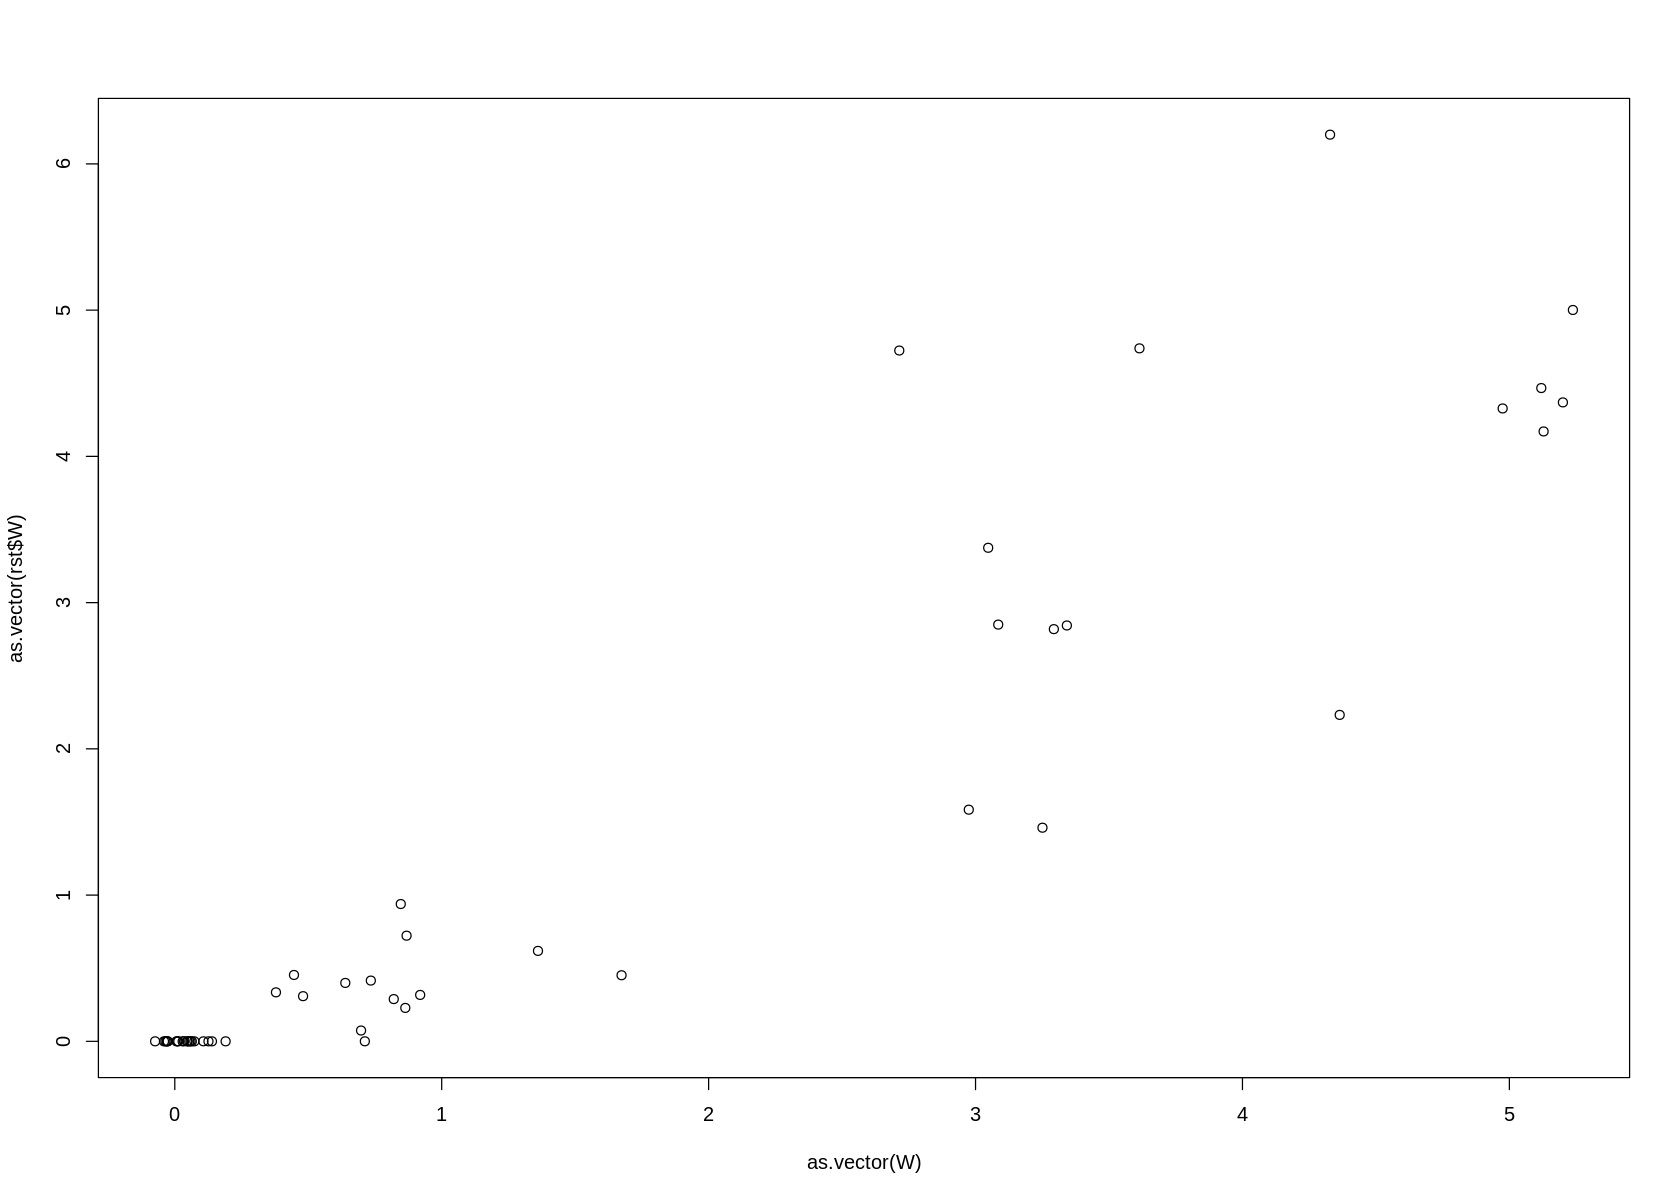

In [8]:
rst.para<-runOptimalPara(X.sample,AS,A0,D,K,N, epsilon = 0.01,fixed_loop=50,depth=3,lambda1.on=T,lambda2.on=T)
rst<-run(X.sample,rst.para$para$lambda1,rst.para$para$lambda2,rst.para$para$mu,rst.para$para$eta,
            AS,A0,D,K,N, epsilon = 10^(-3),fixed_loop=2000)

In [9]:
truth_ct = seur$label

In [10]:
H_est <- data.frame(rst$H)
H_est <- cbind(matrix(colnames(A0),ncol=1),H_est)
H_est[,1] <- c("naïve B cells","CD4 T-cells","CD8 T-cells","monocytes","NK cells")

In [11]:
get_truth <- function(true_ct){
    return(which(as.character(H_est[,1]) == true_ct))
}
predict_realdata<-function(h){
    loc = which(h == max(h))
    return(H_est[,1][loc])
}

In [12]:
celltype_pred <- apply(rst$H, 2, predict_realdata)

In [13]:
cnt_max = 0
for(i in 1:length(truth_ct)){
    cnt_max = cnt_max + 1*(truth_ct[i]==celltype_pred[i])
}  
cnt_max
print(cnt_max/N)

[1] 2429

[1] 0.8829517


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


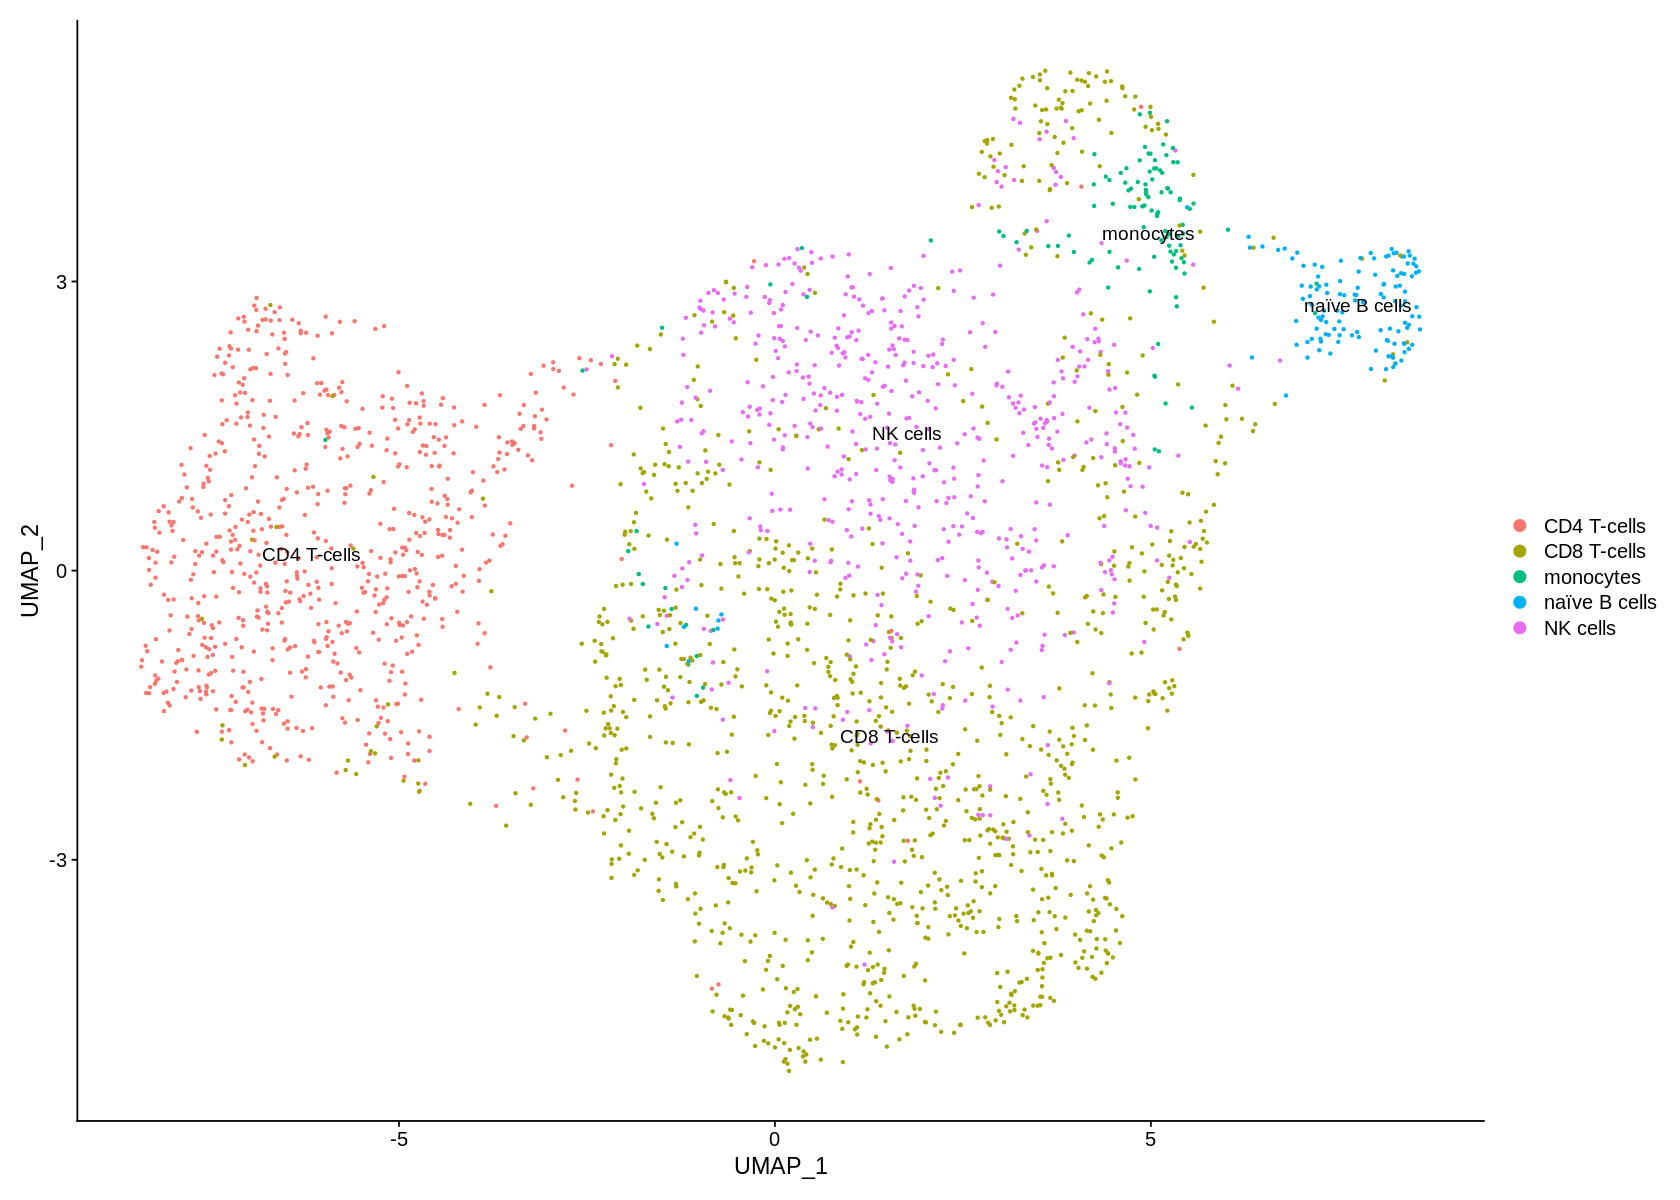

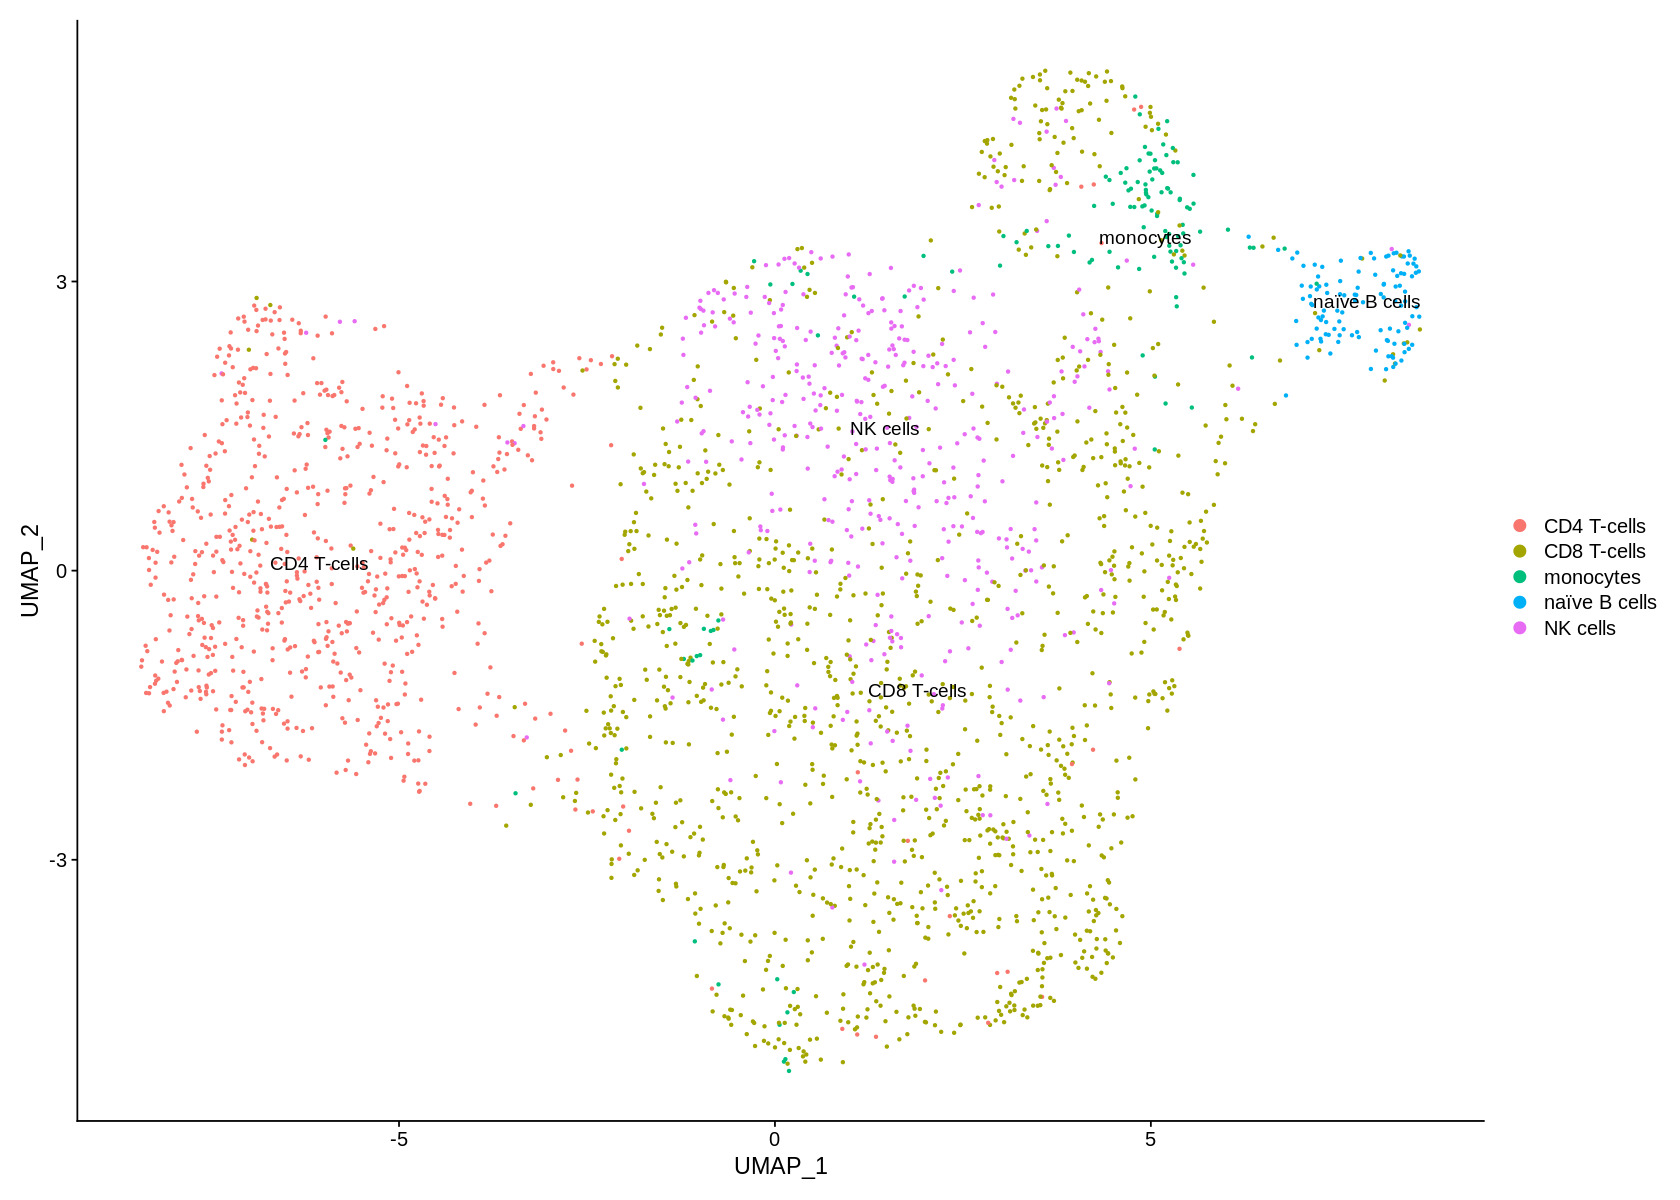

In [14]:
seur$pred = celltype_pred
DimPlot(seur, reduction='umap', group.by = 'pred',label = TRUE)
DimPlot(seur, reduction='umap', group.by = 'label',label = TRUE)

In [16]:
## subsetting
H_est_subsetting <- H_est[,-1]
H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))

In [17]:
H_est_subsetting[,1:10]

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
1.369773e-20,8.838661e-44,1.509824e-01,7.577876e-02,4.448538e-02,3.776206e-01,1.453928e-20,2.025539e-20,5.657829e-01,1.731321e-01
9.996456e-01,9.999999e-01,6.570936e-06,6.245497e-01,1.368873e-07,3.663868e-07,1.338265e-01,8.364615e-07,3.701299e-06,9.982636e-07
3.544442e-04,5.341121e-08,4.789615e-02,2.614589e-01,4.468719e-01,6.223790e-01,7.946710e-01,1.848684e-01,3.510674e-01,4.939104e-01
2.044086e-20,9.496626e-42,3.698003e-02,3.821259e-02,7.147210e-04,4.486101e-10,3.414172e-21,2.475241e-30,7.847832e-19,3.329565e-01
2.250318e-15,4.646858e-09,7.641348e-01,6.461229e-27,5.079279e-01,1.560718e-09,7.150256e-02,8.151307e-01,8.314598e-02,1.103057e-19


In [25]:
cnt_max = 0
N_subsetting = 0
idx.subsetting = 0
for(i in 1:length(truth_ct)){
    if(max(H_est_subsetting[,i])>0.6){
        idx.subsetting = c(idx.subsetting,i)
        N_subsetting = N_subsetting+1
        cnt_max = cnt_max + 1*(truth_ct[i]==celltype_pred[i])
    }
    
}  
cnt_max
print(cnt_max/N_subsetting)

[1] 1947

[1] 0.9488304


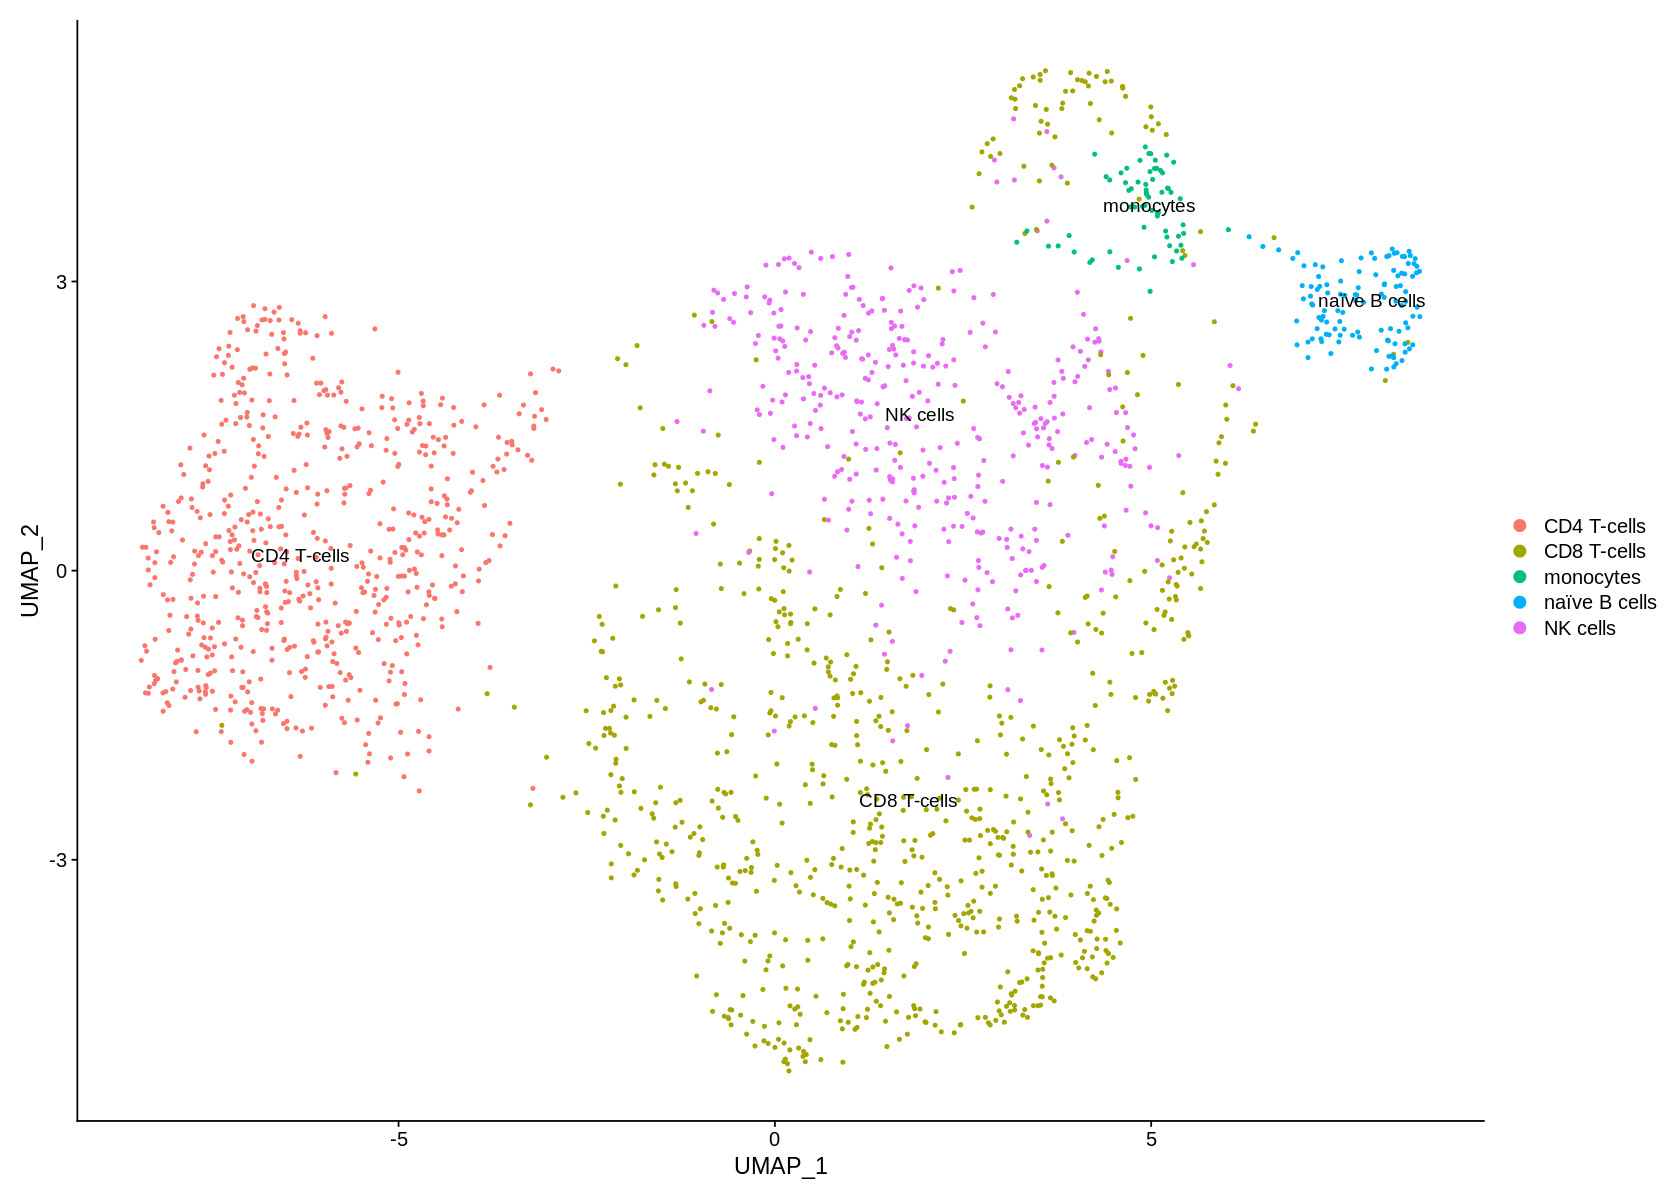

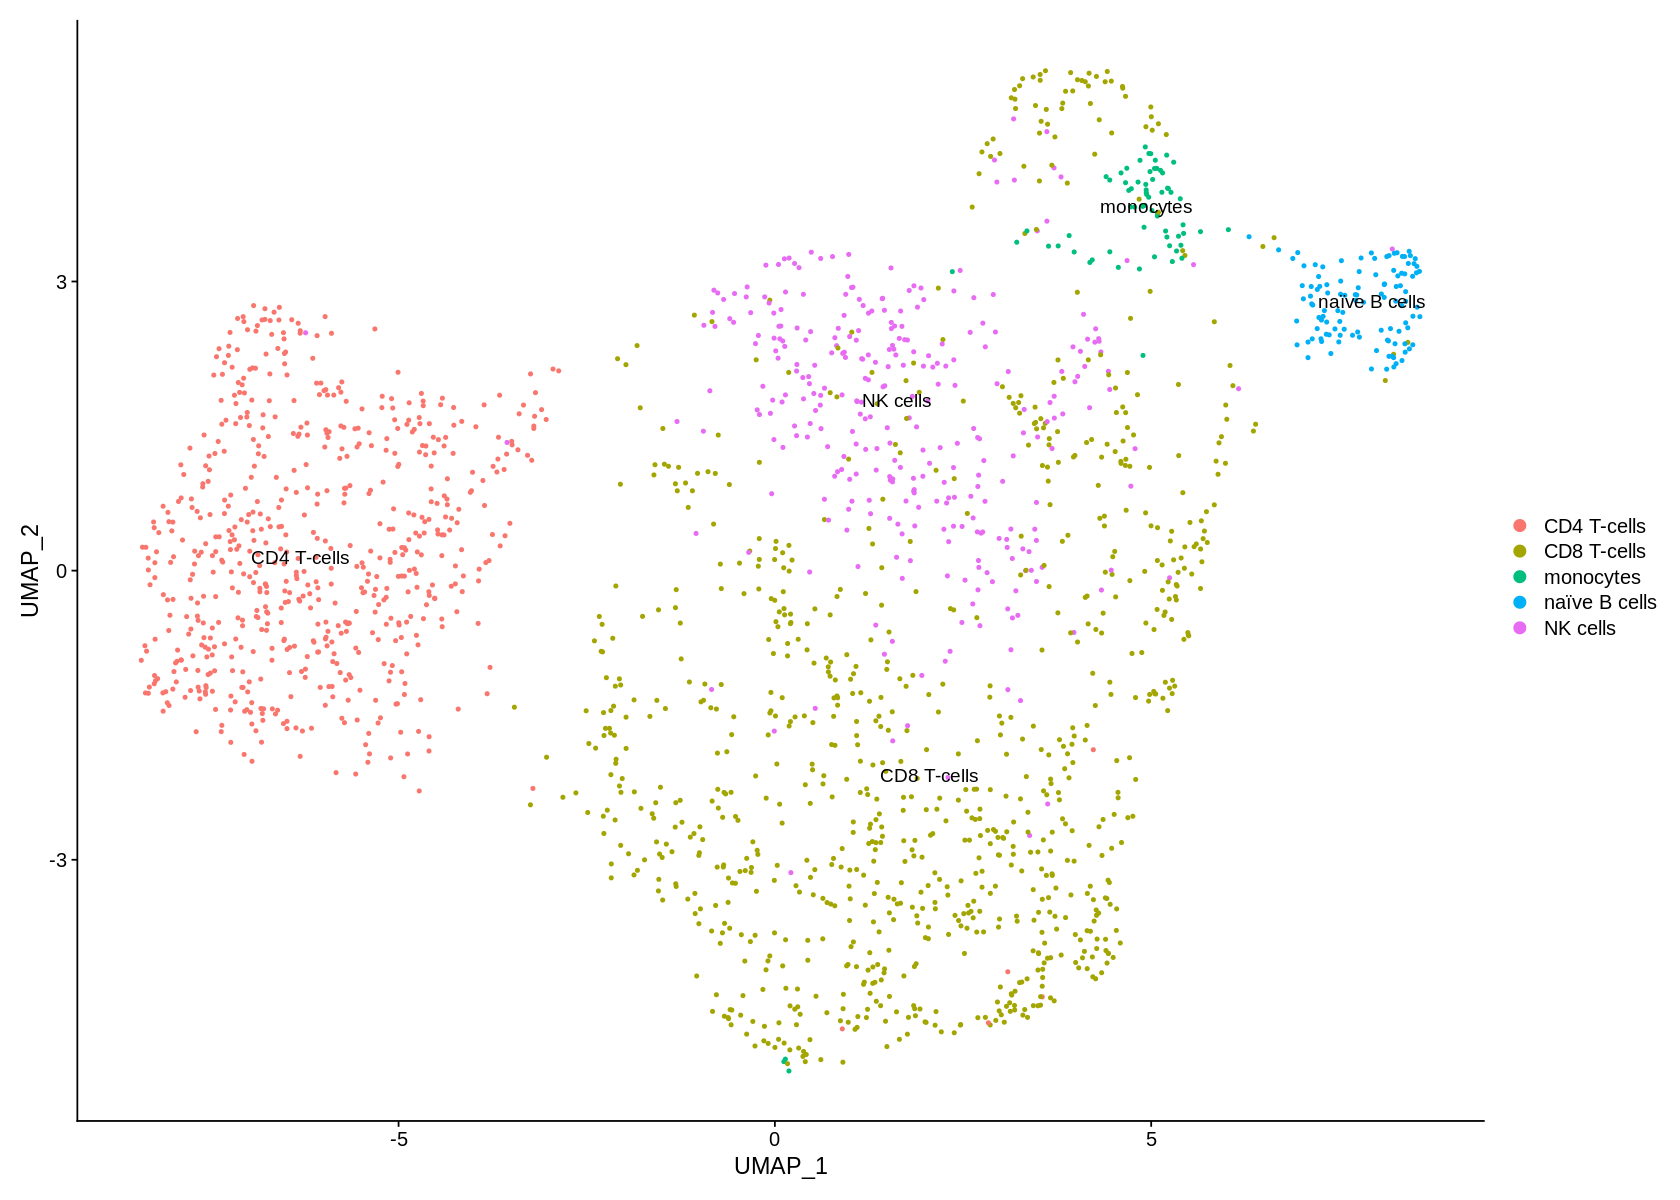

In [26]:
seur$pred = celltype_pred
DimPlot(seur,cells = Cells(seur)[idx.subsetting], reduction='umap', group.by = 'pred',label = TRUE)
DimPlot(seur, cells = Cells(seur)[idx.subsetting],reduction='umap', group.by = 'label',label = TRUE)

In [30]:
## get BCR_run dsq bash
## write dsq files
sample.list<-unique(metadata.BCR$sample_id)
ct.cnt.list <- c(5,6,7)
writefunc <-"   "
for(i in 1:length(sample.list)){
    for(j in 1:length(ct.cnt.list)){
        writefunc<-rbind(writefunc, paste0('module load R; cd /gpfs/ysm/pi/zhao-data/wd262/new_cytof/CyTOF_classification; Rscript ./BCR_RealApplication/run_BCR.R ',sample.list[i],' ',ct.cnt.list[j]) )
    }
}
write.table(writefunc, file ='/gpfs/ysm/pi/zhao-data/wd262/new_cytof/Real_Application/BCR_GetRst_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)
